slope -0.06540341157198014 y-intercept 1.9623742427300275 MSE 1.068033539803735


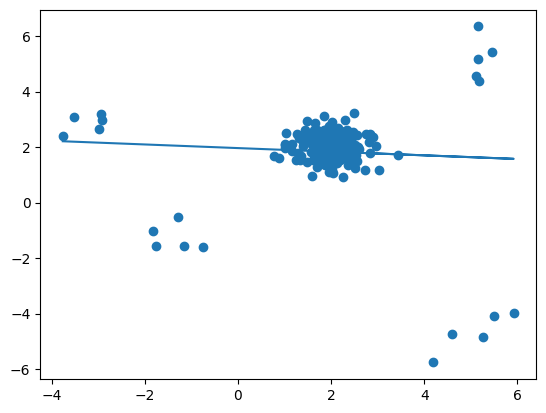

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

dataset = pd.read_excel('/content/Activity_1_Data (1).xlsx')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

error = 0.0001
a = 0.001/(np.std(x)*np.std(y))
m = len(x)

def ssd(w1,w0,z):
 sum = np.sum(((w1*x+w0-y))/(m)*z)
 return sum

def mse(w1,w0):
  sum=np.sum((w1*x+w0-y)**2)/(2*m)
  return sum

w1 = random.randint(0,100)
w0 = random.randint(0,100)
while (abs(ssd(w1,w0,x))>error) and (abs(ssd(w1,w0,1))>error):
 w0 = w0 - a*ssd(w1,w0,1)
 w1 = w1 - a*ssd(w1,w0,x)
print("slope",w1,"y-intercept",w0,"MSE",mse(w1,w0))

plt.scatter(x,y)
plt.plot(x,w1*x+w0)

In [16]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
data = pd.read_csv('/content/BostonHousing.csv')
colums = (data.columns[0])
max= [data[c].max() for c in data.columns]
min= [data[c].min() for c in data.columns]
i=0
for c in data.columns:
    while(i<len(data.columns)):
        data[c]=(data[c]-min[i])/(max[i]-min[i])
        i=i+1
        break
arr = data.values
x_train=[]
y1=[]
y2=[]
a=data.shape
for i in range(a[0]):
    x_train.append((arr[i][:-2]).tolist())
    y2.append(arr[i][-1])
    y1.append(arr[i][-2])
m=np.ones((data.shape[0],1))
b=np.matrix(x_train)
b=np.concatenate((m,b),axis=1)
d=b.T
e=np.linalg.inv(np.matmul(d,b))
y1=np.matrix(y1)
y1=y1.T
y2=np.matrix(y2)
y2=y2.T
f=np.matmul(e,d)
c1=np.matmul(f,y1)
c2=np.matmul(f,y2)
x_test=[[1],]
for j in range (8):
    inp=[float(input("Enter Value:"))]
    x_test.append(inp)
for i in range(8):
    x_test[i+1][0]=(x_test[i+1][0]-min[i])/(max[i]-min[i])
x_test=np.matrix(x_test)
Y1=np.matmul(c1.T,x_test)
Y2=np.matmul(c2.T,x_test)
print(Y1*(max[-2]-min[-2])+min[-2])
print((Y2*(max[-1]-min[-1]))+min[-1])


Enter Value:45
Enter Value:32
Enter Value:65
Enter Value:12
Enter Value:79
Enter Value:44
Enter Value:39
Enter Value:2


ValueError: ignored